### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download a few [MTA turnstile data files](http://web.mta.info/developers/turnstile.html)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }


In [2]:
import wget

url_template = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_%s.txt'
for date in ['161231', '161224', '161217', '161210']:
    url = url_template % date
    wget.download(url)
    print(date, 'file downloaded')

161231 file downloaded
161224 file downloaded
161217 file downloaded
161210 file downloaded


In [4]:
import csv, glob
from collections import defaultdict

def read_csv(csv_file_name):
    turnstile_to_count_reading = defaultdict(list)
    with open(csv_file_name, 'r') as csv_file:
        mta_reader = csv.reader(csv_file)
        for i, row in enumerate(mta_reader):
            if i == 0:
                continue
            
            turnstile_info = tuple(row[:4])
            count_reading = row[4:]
            turnstile_to_count_reading[turnstile_info].append(count_reading)
    
    return turnstile_to_count_reading

In [5]:
weekly_data_dicts = [read_csv(csvfile) for csvfile in glob.glob('turnstile_*.txt')]

In [6]:
sample_dict = list(weekly_data_dicts[0].items())[:2]

In [7]:
print(sample_dict)

[(('A049', 'R088', '02-00-00', 'CORTLANDT ST'), [['RNW', 'BMT', '12/03/2016', '00:00:00', 'REGULAR', '0000237904', '0000154264                                         '], ['RNW', 'BMT', '12/03/2016', '04:00:00', 'REGULAR', '0000237904', '0000154264                                         '], ['RNW', 'BMT', '12/03/2016', '08:00:00', 'REGULAR', '0000237904', '0000154264                                         '], ['RNW', 'BMT', '12/03/2016', '12:00:00', 'REGULAR', '0000237904', '0000154264                                         '], ['RNW', 'BMT', '12/03/2016', '16:00:00', 'REGULAR', '0000237904', '0000154264                                         '], ['RNW', 'BMT', '12/03/2016', '20:00:00', 'REGULAR', '0000237904', '0000154265                                         '], ['RNW', 'BMT', '12/04/2016', '00:00:00', 'REGULAR', '0000237904', '0000154265                                         '], ['RNW', 'BMT', '12/04/2016', '04:00:00', 'REGULAR', '0000237904', '0000154265                    

In [8]:
from pprint import pprint
pprint(sample_dict)

[(('A049', 'R088', '02-00-00', 'CORTLANDT ST'),
  [['RNW',
    'BMT',
    '12/03/2016',
    '00:00:00',
    'REGULAR',
    '0000237904',
    '0000154264                                         '],
   ['RNW',
    'BMT',
    '12/03/2016',
    '04:00:00',
    'REGULAR',
    '0000237904',
    '0000154264                                         '],
   ['RNW',
    'BMT',
    '12/03/2016',
    '08:00:00',
    'REGULAR',
    '0000237904',
    '0000154264                                         '],
   ['RNW',
    'BMT',
    '12/03/2016',
    '12:00:00',
    'REGULAR',
    '0000237904',
    '0000154264                                         '],
   ['RNW',
    'BMT',
    '12/03/2016',
    '16:00:00',
    'REGULAR',
    '0000237904',
    '0000154264                                         '],
   ['RNW',
    'BMT',
    '12/03/2016',
    '20:00:00',
    'REGULAR',
    '0000237904',
    '0000154265                                         '],
   ['RNW',
    'BMT',
    '12/04/2016',
    '00:00:00',
  

## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [9]:
from datetime import datetime
from dateutil.parser import parse

def convert_week_data_to_time_series(week_data_dict):
    turnstile_to_time_series = defaultdict(list)
    for i, (turnstile, row_data) in enumerate(week_data_dict.items()):
        if i % 100 == 0:
            print('Processing turnstile', turnstile)
        for lines, division, datestr, timestr, event, cum_entries, cum_exits in row_data:
            timestamp = parse('%sT%s' % (datestr, timestr))
            turnstile_to_time_series[turnstile].append([timestamp, int(cum_entries)])
            
    return turnstile_to_time_series

In [10]:
weekly_time_series = list(map(convert_week_data_to_time_series, weekly_data_dicts))

Processing turnstile ('A049', 'R088', '02-00-00', 'CORTLANDT ST')
Processing turnstile ('H019', 'R294', '00-00-01', 'MORGAN AV')
Processing turnstile ('N601A', 'R319', '01-05-00', 'LEXINGTON AV/63')
Processing turnstile ('N045', 'R187', '01-00-02', '81 ST-MUSEUM')
Processing turnstile ('R416', 'R245', '00-00-00', 'ST LAWRENCE AV')
Processing turnstile ('R200A', 'R041', '01-05-01', 'BOWLING GREEN')
Processing turnstile ('H023', 'R236', '00-06-02', 'DEKALB AV')
Processing turnstile ('N043', 'R186', '00-00-00', '86 ST')
Processing turnstile ('N119', 'R199', '00-00-01', 'KINGSTON-THROOP')
Processing turnstile ('J020', 'R433', '00-00-01', 'ALABAMA AV')
Processing turnstile ('N417', 'R269', '00-00-00', 'BEDFORD-NOSTRAN')
Processing turnstile ('A015', 'R081', '00-00-03', '49 ST')
Processing turnstile ('K026', 'R100', '00-05-00', 'METROPOLITAN AV')
Processing turnstile ('N215', 'R237', '00-00-02', '182-183 STS')
Processing turnstile ('N339', 'R114', '01-05-01', 'PARSONS BLVD')
Processing turns

In [11]:
sample_turnstile_to_time_series = list(weekly_time_series[0].items())[:2]
pprint(sample_turnstile_to_time_series)

[(('A049', 'R088', '02-00-00', 'CORTLANDT ST'),
  [[datetime.datetime(2016, 12, 3, 0, 0), 237904],
   [datetime.datetime(2016, 12, 3, 4, 0), 237904],
   [datetime.datetime(2016, 12, 3, 8, 0), 237904],
   [datetime.datetime(2016, 12, 3, 12, 0), 237904],
   [datetime.datetime(2016, 12, 3, 16, 0), 237904],
   [datetime.datetime(2016, 12, 3, 20, 0), 237904],
   [datetime.datetime(2016, 12, 4, 0, 0), 237904],
   [datetime.datetime(2016, 12, 4, 4, 0), 237904],
   [datetime.datetime(2016, 12, 4, 8, 0), 237904],
   [datetime.datetime(2016, 12, 4, 12, 0), 237904],
   [datetime.datetime(2016, 12, 4, 16, 0), 237904],
   [datetime.datetime(2016, 12, 4, 20, 0), 237904],
   [datetime.datetime(2016, 12, 5, 0, 0), 237904],
   [datetime.datetime(2016, 12, 5, 4, 0), 237904],
   [datetime.datetime(2016, 12, 5, 8, 0), 237919],
   [datetime.datetime(2016, 12, 5, 12, 0), 238011],
   [datetime.datetime(2016, 12, 5, 16, 0), 238205],
   [datetime.datetime(2016, 12, 5, 20, 0), 238419],
   [datetime.datetime(201

In [19]:
herald_example = weekly_time_series[0][('N507', 'R023', '00-03-01', '34 ST-HERALD SQ')]
herald_example[:5]

[[datetime.datetime(2016, 12, 3, 3, 0), 2102326],
 [datetime.datetime(2016, 12, 3, 7, 0), 2102328],
 [datetime.datetime(2016, 12, 3, 11, 0), 2102354],
 [datetime.datetime(2016, 12, 3, 15, 0), 2102456],
 [datetime.datetime(2016, 12, 3, 19, 0), 2102623]]

In [43]:
station_dict = {}
station_series = []

previous_day = None
for day, entries in herald_example:
    time = day.time()
    
    if previous_day is None:
        period_entries = 0
    else:
        period_entries = entries - previous_day

    previous_day = entries
    
    if time not in station_dict:
        station_dict[time] = 0

    station_dict[time] += period_entries
    
    station_series.append((day, period_entries))

    

In [44]:
station_dict

{datetime.time(3, 0): 25,
 datetime.time(7, 0): 119,
 datetime.time(11, 0): 2546,
 datetime.time(15, 0): 926,
 datetime.time(19, 0): 2414,
 datetime.time(23, 0): 1025}

In [59]:
sorted_stations = sorted(station_dict.items(), key=lambda x: x[0], reverse=False)

In [60]:
times, values = zip(*sorted_stations)

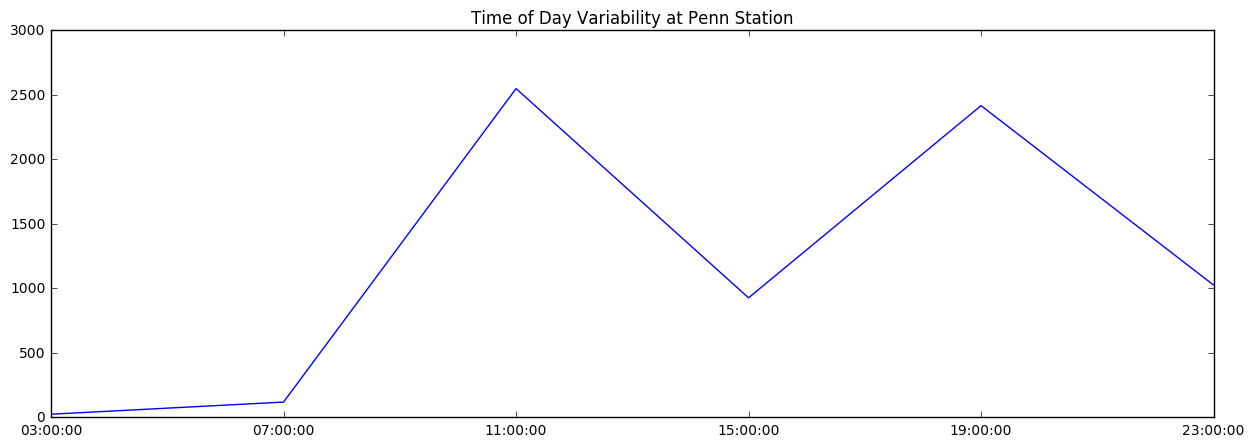

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

# times = list(station_dict.keys())
# values = list(station_dict.values())
plt.figure(figsize=(15,5))
plt.plot(range(len(times)), values)
plt.title('Time of Day Variability at Penn Station')
plt.xticks(range(len(times)), times)
plt.savefig('images/day_var.jpg')

In [ ]:
# from itertools import groupby

# def count_within_normal_bounds(count):
#     if count is None:
#         return True
#     else:
#         return 10000 > count >= 0

# def convert_time_series_to_daily(high_res_time_series):
#     daily_time_series = []
    
#     def day_of_timestamp(time_series_entry):
#         timestamp, tot_entries = time_series_entry
#         return timestamp.date()
    
#     count_on_previous_day = None
#     for day, entries_on_this_day in groupby(high_res_time_series, key=day_of_timestamp):
#         cum_entry_count_on_day = max([count for time, count in entries_on_this_day])
        
#         if count_on_previous_day is None:
#             daily_entries = None
#         else:
#             daily_entries = cum_entry_count_on_day - count_on_previous_day
            
#         count_on_previous_day = cum_entry_count_on_day
        
#         if count_within_normal_bounds(daily_entries):
#             daily_time_series.append((day, daily_entries))
#         else:
#             print('WARNING. Abnormal entry count found on day %s: %s' % (day, daily_entries))
#             daily_time_series.append((day, None))
            
#     return daily_time_series       
    

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

time_series = turnstile_to_daily_time_series[('H001', 'R175', '00-06-01', '8 AV')]
days, counts = zip(*time_series)
plt.figure(figsize=(15,5))
plt.plot(days, counts)

## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [12]:
def combine_multiple_weeks_into_single_high_res_timeseries(weekly_time_series):
    combined_time_series = defaultdict(list)
    for turnstile_to_weeklong_time_series in weekly_time_series:
        for turnstile, weeklong_time_series in turnstile_to_weeklong_time_series.items():
            combined_time_series[turnstile] += weeklong_time_series
            
    return combined_time_series

In [13]:
turnstile_to_full_time_series = combine_multiple_weeks_into_single_high_res_timeseries(weekly_time_series)

In [14]:
type(turnstile_to_full_time_series)

collections.defaultdict

In [15]:
list(turnstile_to_full_time_series.items())[:2]

[(('A049', 'R088', '02-00-00', 'CORTLANDT ST'),
  [[datetime.datetime(2016, 12, 3, 0, 0), 237904],
   [datetime.datetime(2016, 12, 3, 4, 0), 237904],
   [datetime.datetime(2016, 12, 3, 8, 0), 237904],
   [datetime.datetime(2016, 12, 3, 12, 0), 237904],
   [datetime.datetime(2016, 12, 3, 16, 0), 237904],
   [datetime.datetime(2016, 12, 3, 20, 0), 237904],
   [datetime.datetime(2016, 12, 4, 0, 0), 237904],
   [datetime.datetime(2016, 12, 4, 4, 0), 237904],
   [datetime.datetime(2016, 12, 4, 8, 0), 237904],
   [datetime.datetime(2016, 12, 4, 12, 0), 237904],
   [datetime.datetime(2016, 12, 4, 16, 0), 237904],
   [datetime.datetime(2016, 12, 4, 20, 0), 237904],
   [datetime.datetime(2016, 12, 5, 0, 0), 237904],
   [datetime.datetime(2016, 12, 5, 4, 0), 237904],
   [datetime.datetime(2016, 12, 5, 8, 0), 237919],
   [datetime.datetime(2016, 12, 5, 12, 0), 238011],
   [datetime.datetime(2016, 12, 5, 16, 0), 238205],
   [datetime.datetime(2016, 12, 5, 20, 0), 238419],
   [datetime.datetime(201

In [1]:
def convert_turnstile_to_high_res_time_series_to_daily(turnstile_to_time_series):
    turnstile_to_daily_time_series = {}
    for i, (turnstile, time_series) in enumerate(turnstile_to_time_series.items()):
        print('Processing turnstile', turnstile)
        turnstile_to_daily_time_series[turnstile] = convert_time_series_to_daily(time_series)
    
    return turnstile_to_daily_time_series

In [2]:
from itertools import groupby

def count_within_normal_bounds(count):
    if count is None:
        return True
    else:
        return 10000 > count >= 0

def convert_time_series_to_daily(high_res_time_series):
    daily_time_series = []
    
    def day_of_timestamp(time_series_entry):
        timestamp, tot_entries = time_series_entry
        return timestamp.date()
    
    count_on_previous_day = None
    for day, entries_on_this_day in groupby(high_res_time_series, key=day_of_timestamp):
        cum_entry_count_on_day = max([count for time, count in entries_on_this_day])
        
        if count_on_previous_day is None:
            daily_entries = None
        else:
            daily_entries = cum_entry_count_on_day - count_on_previous_day
            
        count_on_previous_day = cum_entry_count_on_day
        
        if count_within_normal_bounds(daily_entries):
            daily_time_series.append((day, daily_entries))
        else:
            print('WARNING. Abnormal entry count found on day %s: %s' % (day, daily_entries))
            daily_time_series.append((day, None))
            
    return daily_time_series       
    

In [3]:
turnstile_to_daily_time_series = convert_turnstile_to_high_res_time_series_to_daily(turnstile_to_full_time_series)

NameError: name 'turnstile_to_full_time_series' is not defined

In [53]:
pprint(turnstile_to_daily_time_series[('H001', 'R175', '00-06-01', '8 AV')])

[(datetime.date(2016, 12, 3), None),
 (datetime.date(2016, 12, 4), 1586),
 (datetime.date(2016, 12, 5), 1715),
 (datetime.date(2016, 12, 6), 1882),
 (datetime.date(2016, 12, 7), 1862),
 (datetime.date(2016, 12, 8), 2111),
 (datetime.date(2016, 12, 9), 2184),
 (datetime.date(2016, 12, 10), 1874),
 (datetime.date(2016, 12, 11), 1455),
 (datetime.date(2016, 12, 12), 1858),
 (datetime.date(2016, 12, 13), 1907),
 (datetime.date(2016, 12, 14), 2103),
 (datetime.date(2016, 12, 15), 1773),
 (datetime.date(2016, 12, 16), 1802),
 (datetime.date(2016, 12, 17), 1575),
 (datetime.date(2016, 12, 18), 1387),
 (datetime.date(2016, 12, 19), 1535),
 (datetime.date(2016, 12, 20), 1639),
 (datetime.date(2016, 12, 21), 1904),
 (datetime.date(2016, 12, 22), 1851),
 (datetime.date(2016, 12, 23), 1602),
 (datetime.date(2016, 12, 24), 964),
 (datetime.date(2016, 12, 25), 584),
 (datetime.date(2016, 12, 26), 787),
 (datetime.date(2016, 12, 27), 1349),
 (datetime.date(2016, 12, 28), 1565),
 (datetime.date(2016, 

## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


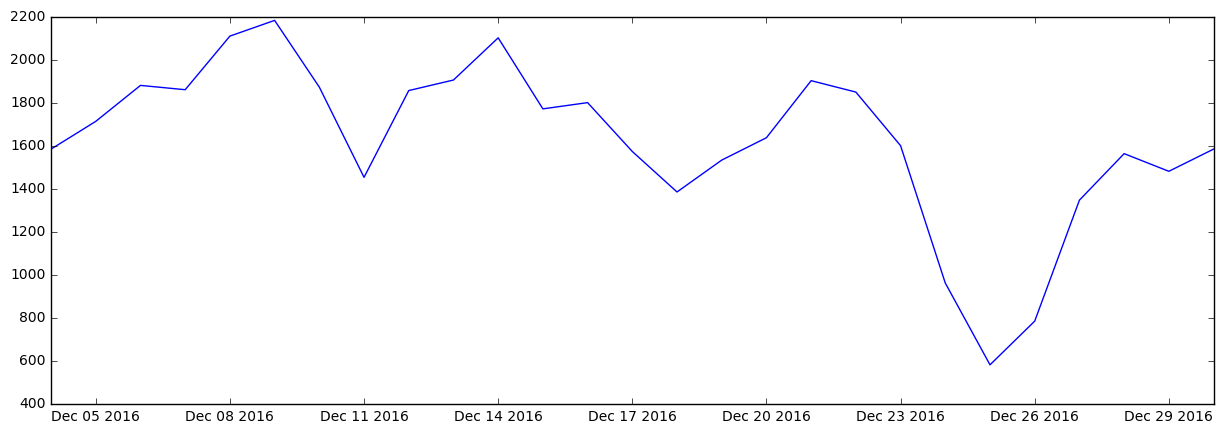

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

time_series = turnstile_to_daily_time_series[('H001', 'R175', '00-06-01', '8 AV')]
days, counts = zip(*time_series)
plt.figure(figsize=(15,5))
plt.plot(days, counts)

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [ ]:
from collections import Counter

def booth_of_a_time_series_item(item):
    turnstile, time_series = item
    control_area, unit, device_id, station = turnstile
    return (control_area, unit, station)

def reduce_turnstile_time_series_to_booths(turnstile_to_daily_time_series):
    turnstile_time_series_items = sorted(turnstile_to_daily_time_series.items())
    booth_to_time_series = {}
    
    for booth, item_list_of_booth in groupby(turnstile_time_series_items, key=booth_of_a_time_series_item):
        daily_counter = Counter()
        for turnstile, time_series in item_list_of_booth:
            for day, count in time_series:
                if count is not None:
                    daily_counter[day] += count
                    
        booth_to_time_series[booth] = sorted(daily_counter.items())
        
    return booth_to_time_series
    
    
booth_to_daily_time_series = reduce_turnstile_time_series_to_booths(turnstile_to_daily_time_series)

In [ ]:
pprint(booth_to_daily_time_series[('H001', 'R175', '8 AV')])

## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [ ]:
def station_of_a_time_series_item(item):
    booth, time_series = item
    control_area, unit, station = booth
    return station

def reduce_booth_time_series_to_stations(booth_to_daily_time_series):
    booth_time_series_items = sorted(booth_to_daily_time_series.items())
    station_to_time_series = {}
    
    for station, item_list_of_station in groupby(booth_time_series_items, key=station_of_a_time_series_item):
        daily_counter = Counter()
        for turnstile, time_series in item_list_of_station:
            for day, count in time_series:
                daily_counter[day] += count
        station_to_time_series[station] = sorted(daily_counter.items())
        
    return station_to_time_series
    
    
station_to_daily_time_series = reduce_booth_time_series_to_stations(booth_to_daily_time_series)

In [ ]:
pprint(station_to_daily_time_series['8 AV'])

## Exercise 7
- Plot the time series for a station

In [ ]:
def plot_station_time_series(station_name, station_to_daily_time_series):
    time_series = station_to_daily_time_series[station_name]
    days, counts = zip(*time_series)
    plt.figure(figsize=(15,5))
    plt.plot(days, counts)
    plt.xlabel('Date')
    plt.ylabel('Number of Turnstile Entries')
    plt.title('Daily Entries for Station %s' % station_name)
    
    
plot_station_time_series('8 AV', station_to_daily_time_series)

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



In [ ]:
import numpy as np

def separate_weeks(time_series):
    time_series_for_each_week = []
    week = []
    
    for i, (day, count) in enumerate(time_series):
        week.append((day, count))
        if i % 7 == 6:
            time_series_for_each_week.append(week)
            week = []
            
    time_series_for_each_week.append(week)
    return time_series_for_each_week
    
def rainbow_plot_for_station(station_name, station_to_daily_time_series):
    time_series = station_to_daily_time_series[station_name]
    time_series_for_each_week = separate_weeks(time_series)

    plt.figure(figsize=(15,5))
    for week in time_series_for_each_week:
        days, counts = zip(*week)
        days = range(len(counts))
        plt.plot(days, counts)
        
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Turnstile Entries')
    plt.title('Ridership per Day for Station %s' % station_name)
    plt.xticks(np.arange(7), ['St', 'Sn', 'Mo', 'Tu', 'We', 'Th', 'Fr'])
    
rainbow_plot_for_station('8 AV', station_to_daily_time_series)

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [ ]:
def station_time_series_item_to_station_total_traffic(item):
    station, time_series = item
    total_traffic = sum([count for day, count in time_series])
    return total_traffic, station

traffic_report = list(map(station_time_series_item_to_station_total_traffic, station_to_daily_time_series.items()))

for total_traffic, station in sorted(traffic_report, reverse=True)[:30]:
    print('%-18s %s' % (station, total_traffic))

## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

In [ ]:
total_ridership_counts = [ridership for ridership, station in traffic_report]
plt.figure(figsize=(15,5))
hist = plt.hist(total_ridership_counts, bins=20)

In [ ]:
import math

log_counts = []

for count in total_ridership_counts:
    try:
        log_result = math.log10(count)
    except:
        pass
    
    log_counts.append(log_result)
    
plt.figure(figsize=(15,5))
n, bins, patches = hist = plt.hist(log_counts, bins=15)

def log_count_to_label(log_count):
    if log_count <= 6:
        return '%.0f Thousand' % 10**(log_count-3)
    else:
        return '%.1f Million' % 10**(log_count-6)


tick_labels = map(log_count_to_label, bins)
ticks = plt.xticks(bins, tick_labels, rotation=70)
plt.xlabel('Total Ridership Count (log 10)')
plt.ylabel('Number of Stations with this Total Count')
plt.title('Distribution of ridership among NYC Subway Stations')

In [ ]:
top_stations = sorted(traffic_report, reverse=True)[:30]
counts, stations = zip(*top_stations)
indices = range(len(counts))
plt.figure(figsize=(15,5))
plt.bar(indices, counts)
ticks = plt.xticks(indices, stations, rotation=70)

In [ ]:
top_stations = sorted(traffic_report, reverse=True)[:15]
counts, stations = zip(*top_stations)
indices = range(len(counts))
plt.figure(figsize=(15,5))
plt.bar(indices, counts)
ticks = plt.xticks(indices, stations, rotation=70)
plt.title('Top 15 Busiest Subway Stations in December 2016')
plt.ylabel('Cumulative Turnstile Entries')
plt.xlabel('Station')
plt.savefig('images/top15.jpg')

In [ ]:
rainbow_plot_for_station('34 ST-PENN STA', station_to_daily_time_series)
plt.savefig('images/weekly_var.jpg')